In [2]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from ..bin import preprocess as prep

results_folder = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.04.03_CJ_batch93_94/"


In [3]:
# Read fp data

fp = pd.read_csv(os.path.join(results_folder, "preprocessed_fp.csv"), index_col='Gene names')
fp = fp.loc[:, ~fp.columns.str.startswith('Identification')]
fp = fp.filter(regex=r'^\S+-\S+-\S')

In [4]:
# Read pp data
pp = pd.read_csv(os.path.join(results_folder, "preprocessed_pp.csv"), index_col=['Gene names', 'Modified sequence', 'Proteins'])
pp = pp.loc[:, ~pp.columns.str.startswith('Identification')]
pp = pp.filter(regex=r'^\S+-\S+-\S')

/tmp/ipykernel_643908/1807174570.py:2: DtypeWarning: Columns (552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,78

In [11]:
print(fp.shape)
print(pp.shape)

fp.head()
# pp.head()

(11894, 549)
(128545, 549)


,I007-031-108742,I043-005-95540,I007-020-1007541,I007-039-130734,I043-001-80842,I043-005-130270,H021-7AAYWW-T1,H021-7AAYWW-T2,H021-ENQC15-T1,H021-ENQC15-T3,...,H021-6A9ZQ6-T2-Q1,H021-CHWE2F-M1-Q1,H021-93RXHR-T1-Q1,H021-FCD4M3-M1-Q1,H021-H5R2S4-M2-Q1,H021-JTAK5Y-M2-Q1,H021-JYZC6N-T1-Q1,H021-LKCJEL-U1-Q1,H021-M4Z12B-M1-Q1,H021-PL5W1B-M1-Q1
Gene names,,,,,,,,,,,,,,,,,,,,,
PLEC,9.689013,9.575113,9.488903,9.600256,9.542554,9.884665,9.891620,10.081573,10.150147,10.040461,...,10.117654,9.129460,10.081302,10.029097,9.779313,10.230535,9.620506,10.276580,9.559661,10.037667
SPARCL1,7.881978,8.074653,8.118346,8.171868,7.591516,8.085046,7.232004,7.436823,6.646629,6.983630,...,7.269523,6.936451,7.653471,6.461516,6.446412,8.309276,6.678135,7.039888,6.853323,7.650905
CKAP4,8.721117,9.328302,8.757485,8.932864,9.187585,9.433666,9.450942,9.927521,9.475336,9.511791,...,9.248073,9.370984,9.636315,9.031711,8.998188,9.426744,9.381322,9.841406,9.083820,9.410123
SPTBN1,9.739912,9.686706,9.865410,9.734828,9.660849,9.643660,9.838817,9.773116,9.314039,9.340033,...,9.824068,9.409068,9.433902,9.404066,9.779078,9.795816,9.428879,9.679052,9.568546,9.416818
TMED10,9.097563,8.713979,9.140202,9.109383,8.730385,8.818948,9.027179,9.035980,8.873049,8.792507,...,8.666612,8.577302,8.773009,8.625856,8.909637,8.727645,8.680285,8.742937,8.667977,8.680828


In [5]:
fp_count = fp.notna().sum()
pp_count = pp.notna().sum()

/tmp/ipykernel_643908/1033867735.py:14: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1a.get_shared_y_axes().join(ax1a, ax1b)
/tmp/ipykernel_643908/1033867735.py:15: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2a.get_shared_y_axes().join(ax2a, ax2b)


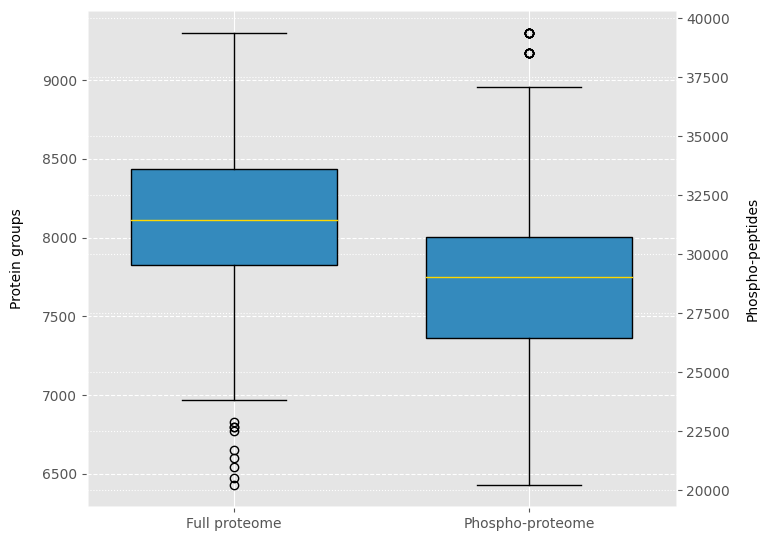

In [97]:
# Boxplot of fp and pp
all_counts = pd.concat([fp_count, pp_count], axis=1)
all_counts = all_counts.rename({0: 'FP', 1: 'PP'}, axis=1)

plt.style.use('ggplot')
plt.rc('axes', axisbelow=True)
fig, ax1a  = plt.subplots(figsize=(7.8, 5.51)) # boxplot 1 grid
ax2a = ax1a.twinx()   # boxplot 2 grid
ax1b = ax1a.twinx()   # boxplot 1
ax2b = ax1a.twinx()   # boxplot 2
ax1b.grid(visible=False)
ax2b.grid(visible=False)
# Link the respective y-axes for grid and plot
ax1a.get_shared_y_axes().join(ax1a, ax1b)
ax2a.get_shared_y_axes().join(ax2a, ax2b)
ticksoff = dict(labelleft=False, labelright=False, left=False, right=False)
ax1a.tick_params(axis="y", **ticksoff)
ax2a.tick_params(axis="y", **ticksoff)
ax1b.tick_params(axis="y", labelleft=True, labelright=False, left=True, right=False)
ax2b.tick_params(axis="y", labelleft=False, labelright=True, left=False, right=True)

# ax1a.set_facecolor('xkcd:white')
props = dict(widths=0.7, patch_artist=True, medianprops=dict(color="gold"))

box1 = ax1b.boxplot(fp_count, positions=[0], **props)
box2 = ax2b.boxplot(pp_count, positions=[1], **props)

# box1 = sns.swarmplot(data=fp_count, ax=ax1b)
# box2 = sns.swarmplot(data=pp_count, ax=ax2b, color='blue')

ax1a.set_xticklabels(['Full proteome', 'Phospho-proteome'])

# for b in box1["boxes"]+box2["boxes"]:
#     b.set_facecolor(next(ax2b._get_lines.prop_cycler)["color"])

ax1a.set_ylabel('Protein groups', labelpad=45)
ax2a.set_ylabel('Phospho-peptides', labelpad=50)

ax1a.yaxis.grid(color='white', linestyle='dashed')
ax2a.yaxis.grid(color='white', linestyle=':')
plt.tight_layout()
plt.show()

# ax2 = ax1.twinx()
# box1 = ax1.boxplot(fp_count, positions=[0], **props)
# box2 = ax2.boxplot(pp_count, positions=[1], **props)
# ax1.set_xticklabels(['Global proteome', 'Phospho-proteome'])
# for b in box1["boxes"]+box2["boxes"]:
#     b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
#
# ax1.set_ylabel('Protein groups')
# ax2.set_ylabel('Phospho-peptides')
# ax1.set_axisbelow(True)
# ax2.set_axisbelow(True)
# ax1.yaxis.grid(color='gray', linestyle='dashed')
# ax2.yaxis.grid(color='gray', linestyle=':')
# plt.show()
# plt.savefig(os.path.join(results_folder, 'count_fp_pp.png'))
# plt.boxplot(data=all_counts)

# sns.boxplot(data=fp_count)
# sns.boxplot(data=pp_count)

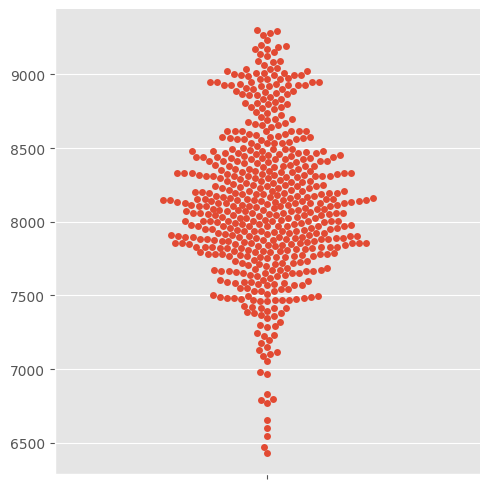

In [31]:
# Swarmplot of fp and pp
plt.style.use('ggplot')
plt.rc('axes', axisbelow=True)
# fig, ax1  = plt.subplots(figsize=(7.8, 5.51))
# ax2 = ax1.twinx()
# fig.suptitle('Swarmplots of full and phosphoproteome')
# ax1.set_title('FP')
# ax2.set_title('PP')
#
# g = sns.FacetGrid(pd.melt(all_counts), col='variable')
# g.map(sns.catplot, "value", alpha=.7)
# sns.catplot(data=pd.melt(all_counts), kind='swarm', x='variable', y='value')
sns.catplot(data=fp_count, kind='swarm')
# swarm1 = sns.catplot(data=fp_count, kind='swarm', ax=ax1)
# swarm2 = sns.catplot(data=pp_count, kind='swarm', ax=ax2)
# plt.show()
# sns.swarmplot(ax=ax2, data=pp_count)


# fig, ax1  = plt.subplots(figsize=(7.8, 5.51))
# props = dict(widths=0.7, patch_artist=True, medianprops=dict(color="gold"))
# ax2 = ax1.twinx()
# box1 = ax1.boxplot(fp_count, positions=[0], **props)
# box2 = ax2.boxplot(pp_count, positions=[1], **props)
# ax1.set_xticklabels(['Full proteome', 'Phospho-proteome'])
# for b in box1["boxes"]+box2["boxes"]:
#     b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
#
# ax1.set_ylabel('Protein groups')
# ax2.set_ylabel('Phospho-peptides')
# ax1.set_axisbelow(True)
# ax2.set_axisbelow(True)
# ax1.yaxis.grid(color='gray', linestyle='dashed')
# ax2.yaxis.grid(color='gray', linestyle='dashed')
# # plt.show()
# plt.savefig(os.path.join(results_folder, 'count_fp_pp.png'))
# plt.boxplot(data=all_counts)

# sns.boxplot(data=fp_count)
# sns.boxplot(data=pp_count)


     variable  value
0          FP   8696
1          FP   8924
2          FP   8860
3          FP   8946
4          FP   8973
...       ...    ...
1093       PP  29268
1094       PP  29268
1095       PP  29268
1096       PP  29268
1097       PP  29268

[1098 rows x 2 columns]


/home/cjensen/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


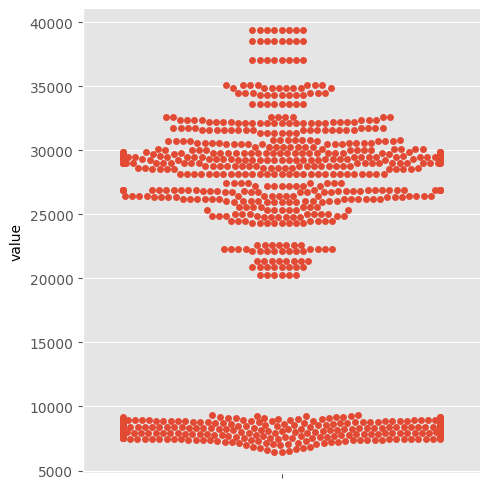

In [55]:
# print(temp_df['variable'])
# Boxplot of fp and pp
ones = pd.Series(np.repeat(1, 549))
ones.name = 'color'
all_counts = pd.concat([fp_count, pp_count], axis=1)

all_counts = all_counts.rename({0: 'FP', 1: 'PP'}, axis=1)
temp_df = pd.melt(all_counts)

sns.catplot(data=temp_df['value'], kind='swarm') #, col='variable')
# sns.boxplot(data=fp_count)
# sns.boxplot(data=pp_count)

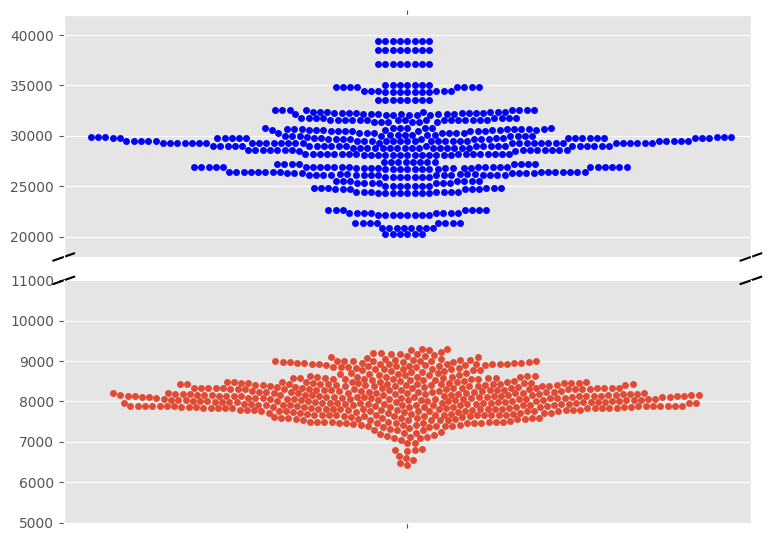

In [66]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7.8, 5.51))
# ax2.boxplot(fp_count, positions=[0])
# ax1.boxplot(pp_count, positions=[1])
sns.swarmplot(data=fp_count, ax=ax2)
sns.swarmplot(data=pp_count, ax=ax1, color='blue')


ax2.set_ylim(5000, 11000)  # fp
ax1.set_ylim(18000, 42000)  # pp

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.tight_layout()
plt.show()